# Proyek Analisis Data: Bike Sharing
- **Nama:** Trio Tahril Rifandi
- **Email:** triotahril99@gmail.com
- **ID Dicoding:** triotahrill

## Menentukan Pertanyaan Bisnis

- Berapa jumlah rata-rata sepeda yang dipinjam setiap hari?
- Apakah ada perbedaan penggunaan sepeda Berdasakan Cuaca?
- Apakah  Antara suhu yang menunjukkan kondisi ketika jumlah penyewaan sepeda tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('https://raw.githubusercontent.com/zyoohere/analisis-data-dicoding/refs/heads/main/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/zyoohere/analisis-data-dicoding/refs/heads/main/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Tabel "Day_df"

In [4]:
day_df.shape

(731, 16)

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Missing Value

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Jumlah Data duplikasi 0

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel "Hour_df"

In [9]:
hour_df.shape

(17379, 17)

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [14]:
drop_columns = ['instant', 'dteday']

for col in day_df.columns:
    if col in drop_columns:
        day_df.drop(labels=col, axis=1, inplace=True)

day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hum' : 'humidity',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [17]:
day_df['weekday'] = day_df ['weekday'].map ({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

day_df['month'] =day_df['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,Spring,0,January,0,Sunday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,Spring,0,January,0,Monday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,Spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,Spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,Spring,0,January,0,Thursday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
day_df['temp'] =(day_df['temp']) * 47 - 8
day_df['atemp'] =(day_df['atemp']) * 66 - 16
day_df['humidity'] = (day_df['humidity']) * 100
day_df['windspeed'] = (day_df['windspeed']) * 62
day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,Spring,0,January,0,Sunday,0,Misty/Cloudy,8.175849,7.999250,80.5833,9.947652,331,654,985
1,Spring,0,January,0,Monday,0,Misty/Cloudy,9.083466,7.346774,69.6087,15.409418,131,670,801
2,Spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,1.229108,-3.499270,43.7273,15.395158,120,1229,1349
3,Spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,1.400000,-1.999948,59.0435,9.938352,108,1454,1562
4,Spring,0,January,0,Thursday,1,Clear/Partly Cloudy,2.666979,-0.868180,43.6957,11.587800,82,1518,1600


In [19]:
day_df.to_csv('day_df_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore Data Day_df

Menganalisa Penyewaan Sepeda berdasarkan Tiap Hari (weekday)

In [20]:
grouped_by_weekday = day_df.groupby('weekday')

aggregated_stats_by_weekday = grouped_by_weekday['count'].agg(['max', 'min', 'mean'])
aggregated_stats_by_weekday

,max,min,mean
weekday,,,
Friday,7804,431,4667.259615
Monday,8227,605,4228.828571
Saturday,8362,1167,4690.288462
Sunday,8714,627,4550.542857
Thursday,8173,441,4548.538462
Tuesday,7525,22,4338.123810
Wednesday,7767,683,4510.663462


Dari data yang terlihat, urutan rata-rata jumlah penyewa sepeda dari yang paling banyak ke yang paling sedikit adalah: Sabtu (Sat), Jumat (Fri), Minggu (Sun), Kamis (Thu), Rabu (Wed), Selasa (Tue), dan Senin (Mon)

Menganalisa Penyewaan Sepeda berdasarkan Cuaca (Weathersit)

In [21]:
grouped_by_weathersit = day_df.groupby('weathersit')

aggregated_stats_by_weathersit = grouped_by_weathersit['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_weathersit

,max,min,mean,sum
weathersit,,,,
Clear/Partly Cloudy,8714,431,4876.786177,2257952
Light Snow/Rain,4639,22,1803.285714,37869
Misty/Cloudy,8362,605,4035.862348,996858


Analisa Penyewaan Berdasarkan Musim (Season)

In [22]:
grouped_by_season = day_df.groupby('season')

aggregated_stats_by_season = grouped_by_season.agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})
aggregated_stats_by_season

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Musim gugur (Fall) dan musim panas (Summer) menunjukkan aktivitas penyewaan sepeda yang lebih tinggi, sedangkan musim semi (Spring) dan musim dingin (Winter) memiliki aktivitas yang sedikit lebih rendah tetapi masih signifikan

In [23]:
grouped_by_holiday = day_df.groupby('holiday')

aggregated_stats_by_holiday = grouped_by_holiday['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_holiday


,max,min,mean,sum
holiday,,,,
0,8714,22,4527.104225,3214244
1,7403,1000,3735.000000,78435


Penyewa Lebih Banyak di Hari Tidak  libur (non-holiday) dibandingkan penyewa lebih sedikit disaat hari libur (Holiday)

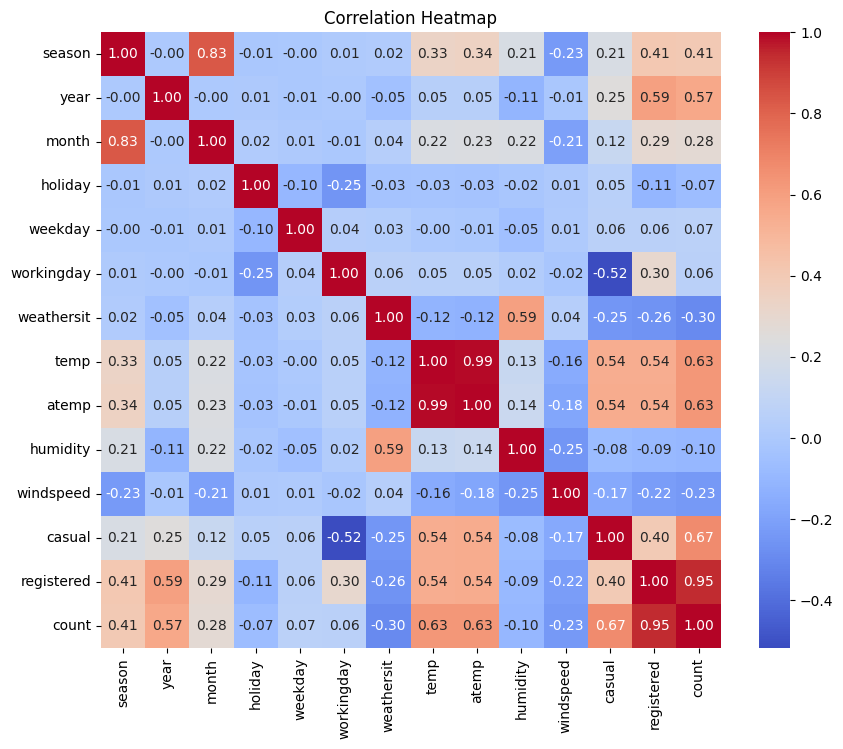

In [25]:
day_df['season'] = day_df['season'].map({'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4})
day_df['weathersit'] = day_df['weathersit'].map({'Clear/Partly Cloudy': 1, 'Misty/Cloudy': 2, 'Light Snow/Rain': 3, 'Severe Weather': 4})
day_df['weekday'] = day_df['weekday'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})
day_df['month'] = day_df['month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

plt.figure(figsize=(10, 8))
sns.heatmap(day_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


 (Count) Total rental sepada memiliki korelasi positif yang kuat dengan (temp) temperatured dan (atemp) Feeling temperature. Ini menunjukkan bahwa seiring dengan meningkatnya suhu, jumlah penyewaan sepeda juga meningkat secara signifikan.

(registered) juga menunjukkan korelasi positif yang kuat dengan suhu, menunjukkan bahwa pengguna terdaftar lebih sensitif terhadap perubahan suhu saat memutuskan untuk menyewa sepeda.

(Casual) juga menunjukkan korelasi positif dengan suhu, meskipun sedikit kurang kuat daripada pengguna terdaftar.

(Humidity) memiliki korelasi negatif dengan hitungan, menunjukkan bahwa tingkat kelembaban yang lebih tinggi tidak menganjurkan penyewaan sepeda.

(Windspeed) juga menunjukkan korelasi yang sedikit negatif dengan 'hitungan', menyiratkan bahwa kecepatan angin yang lebih tinggi dapat mengurangi jumlah penyewaan sepeda, tetapi korelasi ini lebih lemah dibandingkan dengan kelembaban.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah rata-rata sepeda yang dipinjam setiap hari?

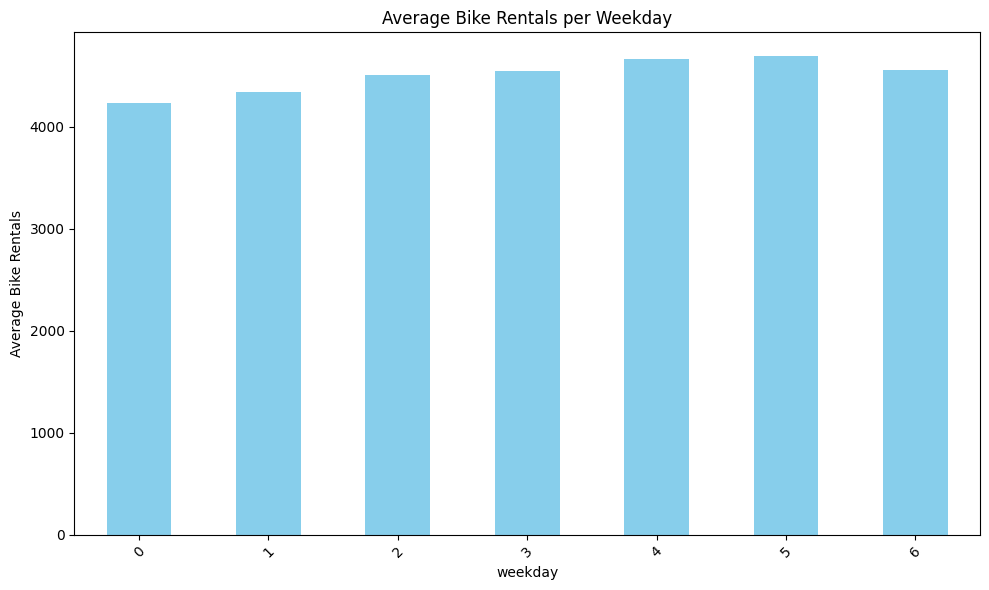

In [29]:

weekday_average = day_df.groupby('weekday')['count'].mean()

plt.figure(figsize=(10, 6))
weekday_average.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals per Weekday')
plt.xlabel('weekday')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Rata-rata penyewaan sepeda per hari:
- Sabtu memiliki rata-rata penyewaan tertinggi, diikuti Jumat dan Minggu.
- Senin memiliki rata-rata penyewaan terendah.


### Pertanyaan 2 : Apakah ada perbedaan penggunaan sepeda Berdasakan Cuaca?

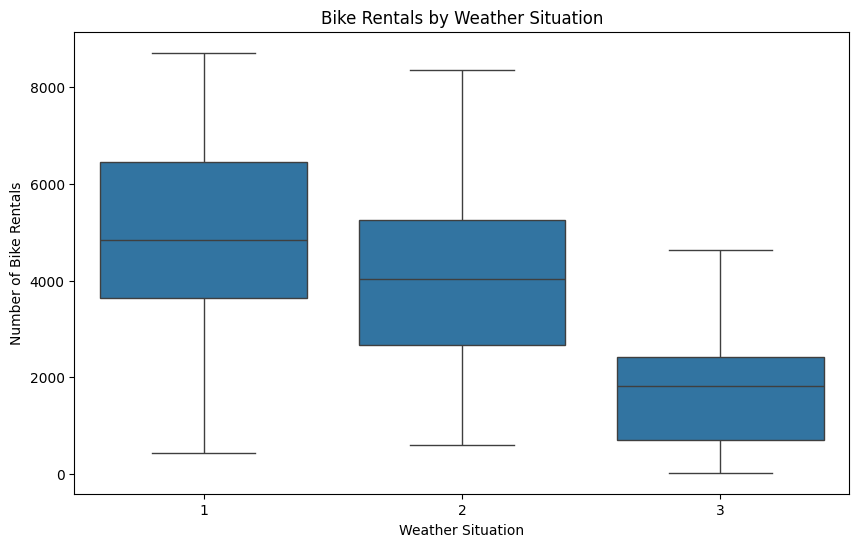

In [30]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='count', data=day_df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Number of Bike Rentals')
plt.show()

Pengaruh cuaca terhadap penyewaan sepeda:
- Cuaca cerah/berawan sebagian ("Clear/Partly Cloudy") memiliki jumlah penyewaan tertinggi.
- Cuaca berkabut/berawan ("Misty/Cloudy") memiliki jumlah penyewaan sedang.
- Cuaca hujan ringan/salju ringan ("Light Snow/Rain") memiliki jumlah penyewaan paling sedikit.


### Pertanyaan 3 : Apakah Antara suhu yang menunjukkan kondisi ketika jumlah penyewaan sepeda tinggi?

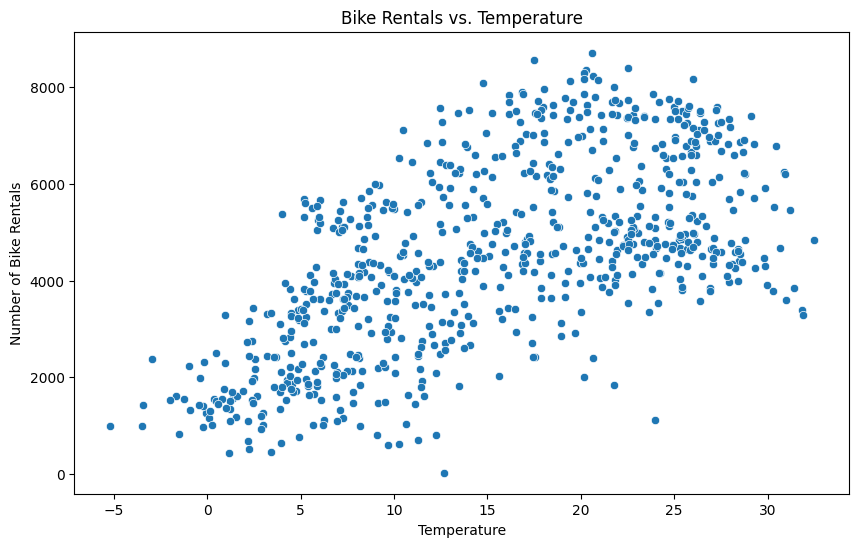

Correlation between temperature and bike rentals: 0.6274940090334916


In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=day_df)
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Bike Rentals')
plt.show()

correlation = day_df['temp'].corr(day_df['count'])
print(f"Correlation between temperature and bike rentals: {correlation}")

Hubungan antara suhu dan penyewaan sepeda:
- Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda.
- Semakin tinggi suhu, semakin banyak sepeda yang disewa.

## Conclusion

Berdasarkan analisis data penyewaan sepeda, ditemukan beberapa kesimpulan penting:

Conclusion Pertanyaan 1 : **Hari dalam seminggu:** Jumlah penyewaan sepeda paling tinggi terjadi pada hari Sabtu, diikuti oleh Jumat dan Minggu.  Hari Senin menunjukkan jumlah penyewaan terendah.  Hal ini mengindikasikan tren penggunaan sepeda yang lebih tinggi pada akhir pekan.

Conclusion Pertanyaan 2 : **Kondisi cuaca:** Cuaca cerah atau berawan sebagian berkontribusi pada jumlah penyewaan sepeda tertinggi.  Sebaliknya, cuaca berkabut atau berawan, serta cuaca hujan ringan atau bersalju ringan, mengurangi jumlah penyewaan.  Kondisi cuaca yang ekstrim (hujan lebat atau salju tebal) memiliki dampak negatif yang signifikan terhadap penyewaan.

Conclusion Pertanyaan 3 : **Suhu:** Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda.  Semakin tinggi suhu, semakin banyak sepeda yang disewa.  Ini menunjukkan bahwa suhu merupakan faktor penting yang mempengaruhi keputusan penyewa sepeda.

Secara keseluruhan, analisis ini menunjukkan bahwa hari dalam seminggu, kondisi cuaca, dan suhu merupakan faktor-faktor utama yang mempengaruhi jumlah penyewaan sepeda.  Informasi ini dapat digunakan untuk strategi bisnis, seperti penyesuaian jumlah sepeda yang disediakan, penjadwalan pemeliharaan, dan kampanye pemasaran yang disesuaikan dengan kondisi cuaca dan hari dalam seminggu.  Analisis lebih lanjut dapat dilakukan dengan mempertimbangkan faktor-faktor lain seperti musim, hari libur, dan waktu dalam sehari untuk mendapatkan pemahaman yang lebih komprehensif.
